# Lab experience number 2: Anomaly Detection
If you have any questions about the lab experience write an e-mail to saverio.cavasin@phd.unipd.it

#Anomaly Detection

**Anomaly detection**, or outlier detection, is the identification of observations, events or data points that deviate from what is usual, standard or expected, making them inconsistent with the rest of a data set.
Anomaly detection has a long history in the field of statistics, where analysts and scientists would study charts looking for any elements that appeared abnormal.

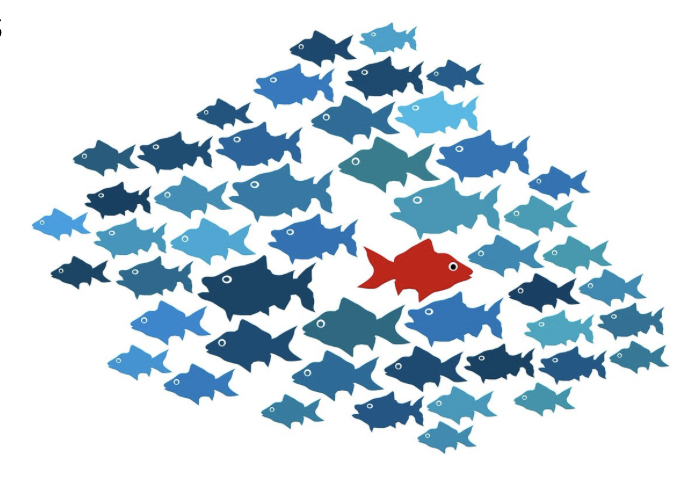

#Why is it so important?

Data anomalies can have a significant impact in the field of data science, leading to incorrect or misleading conclusions. For example, a single outlier can significantly skew the mean of a data set, making it an inaccurate representation of the data. Additionally, data anomalies can impact the performance of machine learning algorithms, as they can cause the model to fit the noise rather than the underlying pattern in the data.

Identifying and handling data anomalies is crucial for several reasons:


1. **Improved data quality**: Identifying and handling data anomalies can  significantly improve data quality, which is essential for accurate and reliable data analysis. By addressing data anomalies, analysts can reduce noise and errors in the data set, ensuring that the data is more representative of the true underlying patterns.



2.  **Enhanced decision making**: Data-driven decision making relies on accurate and reliable data analysis to inform decisions. By identifying and handling data anomalies, analysts can ensure that their findings are more trustworthy, leading to better-informed decisions and improved outcomes.

3. **Optimized machine learning performance**: Data anomalies can significantly impact the performance of machine learning algorithms, as they can cause the model to fit the noise rather than the underlying pattern in the data. By identifying and handling data anomalies, analysts can optimize the performance of their machine learning models, ensuring that they provide accurate and reliable predictions.


#Time Series Data Anomalies

 Three main time-series data anomalies exist: point anomalies, contextual anomalies and collective anomalies.

**Point anomalies**, also known as global outliers, are individual data points that exist far outside the rest of the data set. They can be either intentional or unintentional and may result from errors, noise or unique occurrences. An example of a point anomaly is a bank account withdrawal that is significantly larger than any of the user’s previous withdrawals.   

\

<img src = "https://victoriametrics.com/blog/victoriametrics-anomaly-detection-handbook-chapter-2/anomaly-point.webp" align="center" height=400/>

\

**Contextual anomalies** are data points that deviate from the norm within a specific context. These anomalies are not necessarily outliers when considered in isolation but become anomalous when viewed within their specific context.

For example, consider home energy usage. If there is a sudden increase in energy consumption at midday when no family members are typically home, the anomaly would be contextual. This data point might not be an outlier when compared to energy usage in the morning or evening (when people are usually home), but it is anomalous in the context of the time of day it occurs.

\

<img src = "https://victoriametrics.com/blog/victoriametrics-anomaly-detection-handbook-chapter-2/anomaly-contextual.webp" align="center" height=400/>

\

**Collective anomalies** involve a set of data instances that together deviate from the norm, even though individual instances may appear normal. An example of this type of anomaly would be a network traffic data set that shows a sudden surge in traffic from multiple IP addresses at the same time.

\

<img src = "https://victoriametrics.com/blog/victoriametrics-anomaly-detection-handbook-chapter-2/anomaly-collective.webp" align="center" height=400/>

#Anomaly Classifications:

An anomaly detection system can uncover two general types of anomalies: unintentional and intentional.

**Unintentional anomalies** are data points that deviate from the norm due to errors or noise in the data collection process. These errors can be either systematic or random, originating from issues like faulty sensors or human error during data entry. Unintentional anomalies can distort the data set, making it challenging to derive accurate insights.

**Intentional anomalies** are data points that deviate from the norm due to specific actions or events. These anomalies can provide valuable insights into the data set, as they may highlight unique occurrences or trends. For example, a sudden spike in sales during a holiday season could be considered an intentional anomaly, as it deviates from the typical sales pattern but is expected due to a real-world event.

#Now Let the code begin




## **1. Introduction**
Common anomaly detection applications include:
- Fraud detection in banking transactions.
- Intrusion detection in network security.
- Fault detection in industrial processes.

### **Objectives of This Lab**
1. Load and explore a dataset with anomalies.
2. Build and customize an anomaly detection pipeline using `scikit-learn`.
3. Apply algorithms like `Isolation Forest` to detect anomalies.
4. Evaluate and visualize the results.


## **2. Dataset Loading**
We will use the Credit Card Fraud Detection dataset, which contains transactions made by European cardholders. This dataset is highly imbalanced, with anomalies representing fraudulent transactions.

### **Task**: Load the dataset and display a summary of its structure.

In [ ]:
import pandas as pd

# Load the dataset
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
data = pd.read_csv(url)

# Explore the dataset
# TODO: Display the first few rows and summary statistics of the dataset
#####INSERT YOUR CODE HERE#######

print("First 5 rows of the dataset:")
print(data.head())
print("\nSummary statistics:")
print(data.describe())
print("\nDataset info: ")
data.info()

First 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

   

## **3. Exploratory Data Analysis (EDA)**
### **Objective**: Understand the distribution of anomalies and features.

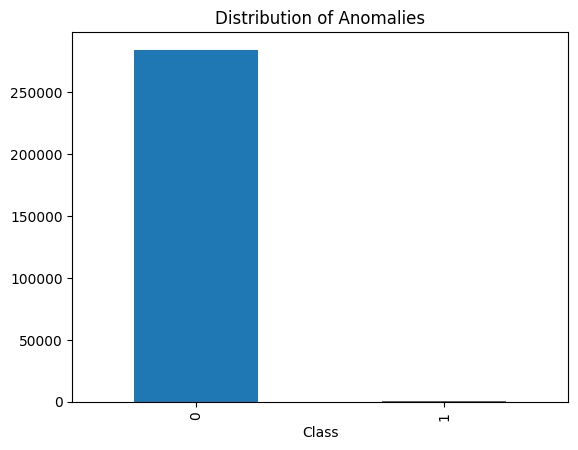

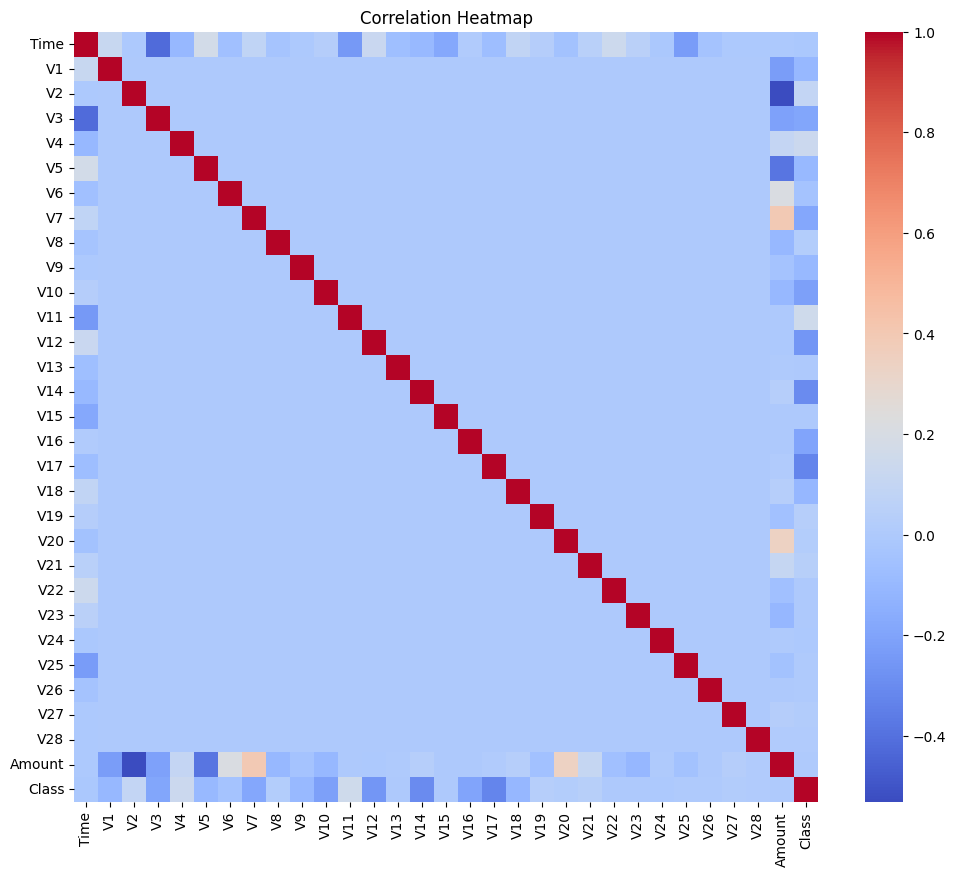

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of anomalies (fraudulent transactions)
counts = data['Class'].value_counts()
counts.plot(kind='bar', title='Distribution of Anomalies')
plt.show()

# Optional: Correlation heatmap

# TODO: Generate a heatmap for feature correlations
#####INSERT YOUR CODE HERE#######

plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## **4. Preprocessing and Splitting Data**
### **Task**: Split the data into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split data
# TODO: Complete the train_test_split function call
#####INSERT YOUR CODE HERE#######

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: X={X_train.shape}, y={y_train.shape}")
print(f"Testing set shape: X={X_test.shape}, y={y_test.shape}")
print(f"Fraud cases in training set: {sum(y_train)} ({sum(y_train)/len(y_train)*100:.2f}%)")
print(f"Fraud cases in testing set: {sum(y_test)} ({sum(y_test)/len(y_test)*100:.2f}%)")

Training set shape: X=(227845, 30), y=(227845,)
Testing set shape: X=(56962, 30), y=(56962,)
Fraud cases in training set: 394 (0.17%)
Fraud cases in testing set: 98 (0.17%)


## **5. Building an Anomaly Detection Pipeline**
We will implement an anomaly detection pipeline using `Isolation Forest`. The pipeline will:
1. Scale the features.
2. Apply the `IsolationForest` algorithm.

### **Task**: Complete the pipeline and train the model.

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM

# Define the pipeline
# First, calculate the contamination rate from the training data
contamination_rate = y_train.mean()
print(f"Using contamination rate: {contamination_rate:.4f}")

# pipeline2 = Pipeline([
#     ("scaler", StandardScaler()),  # Step 1: Scale the features
#    ("model", IsolationForest(contamination=contamination_rate, random_state=42))  # Step 2: Isolation Forest model
#])

#
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Step 1: StandardScaler is ESSENTIAL for SVMs

    # We've replaced IsolationForest with OneClassSVM
    ("model", OneClassSVM(nu=contamination_rate, kernel='rbf', gamma='auto'))
])

#pipeline3 = Pipeline([
#    ("scaler", StandardScaler()),  # Step 1: Scale the features

    # --- BLOCK 8 ---
    # We've added n_estimators=200 to see if it improves performance
#    ("model", IsolationForest(contamination=contamination_rate,
#                             n_estimators=200,  # <-- TUNED PARAMETER
#                             random_state=42))
#])

# Train the model
pipeline.fit(X_train)

# Predict anomalies
# Raw predictions: 1 for inlier, -1 for outlier (anomaly)
y_pred_raw = pipeline.predict(X_test)

# Adjust predictions for comparison (convert -1 to 1 and 1 to 0)
# This new 'y_pred' variable will be used in the evaluation cells
y_pred = (y_pred_raw == -1).astype(int)

# Display a sample to see the transformation
print("Raw predictions (sample):", y_pred_raw[:10])
print("Adjusted predictions (sample):", y_pred[:10])


Using contamination rate: 0.0017
Raw predictions (sample): [ 1  1 -1  1  1  1  1  1  1  1]
Adjusted predictions (sample): [0 0 1 0 0 0 0 0 0 0]


## **6. Evaluation**
### Evaluate the performance of the anomaly detection algorithm.

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Adjust predictions
#y_pred = (y_pred == -1).astype(int)

# Evaluate the model
# Print the classification report and ROC-AUC score

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred))

## **7. Visualization**
### **Task**: Visualize the performance using a confusion matrix and an ROC curve.

Generating Confusion Matrix...


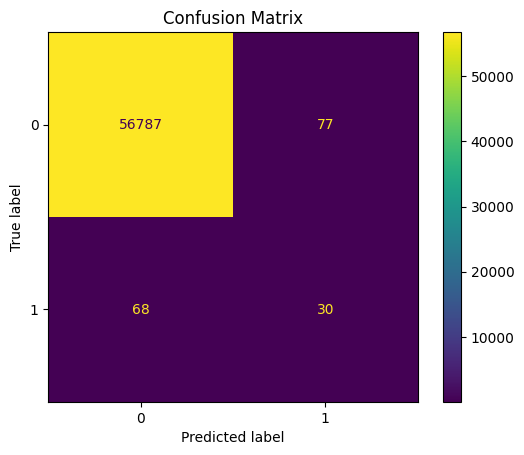

Generating ROC Curve...


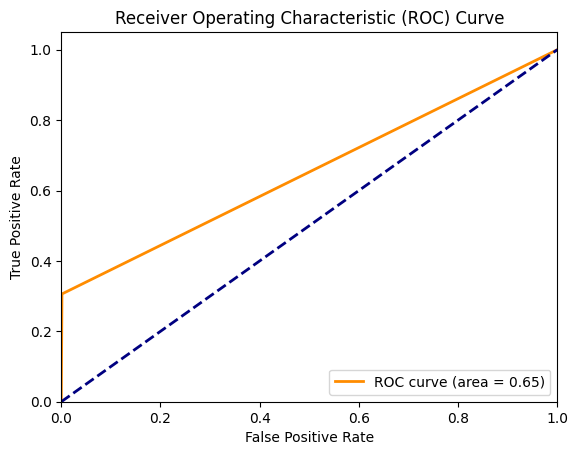

In [ ]:
#from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# Confusion matrix
# TODO: Generate a confusion matrix
#ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
#plt.title("Confusion Matrix")
#plt.show()

# ROC Curve
# TODO: Generate an ROC curve
#fpr, tpr, _ = roc_curve(y_test, y_pred)
#roc_auc = #####INSERT YOUR CODE HERE#######

#####INSERT YOUR CODE HERE#######
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix
# TODO: Generate a confusion matrix
print("Generating Confusion Matrix...")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
# TODO: Generate an ROC curve
print("Generating ROC Curve...")
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr) # Calculate the Area Under the Curve

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # The 50/50 "random guess" line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## **8. Task**

1. Tune the hyperparameters of the `IsolationForest` algorithm.
2. Modify the pipeline to use `One-Class SVM` instead of `IsolationForest`.
3. Experiment with dimensionality reduction techniques like PCA to improve performance.
4. Generate additional visualizations to explore the dataset and results.

####T1. Tune Hyperparametest (Isolation Forest)
Modify the Isolation forest

**`n_estimators`**: This controls the number of random trees built in the "forest." The default is `100`.
- hifher more stable and accurate model, but it take longer to train

in cell 5
- add n_estimators parameter to the Isolation Forest line

```python
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Step 1: Scale the features
    
    # --- MODIFIED LINE ---
    # We've added n_estimators=200 to see if it improves performance
    ("model", IsolationForest(contamination=contamination_rate,
                             n_estimators=200,  # <-- TUNED PARAMETER
                             random_state=42))
])
```

rerun 6 and 7 to check if it improves